**Task**

* Compute the mean of this distribution
* Check whether the sum of the distances of the values that are below the mean is equal to the sum of the distances of the values that are above the mean.

**Answer**

`distribution  <-  c(0,2,3,3,3,4,13)`

`mean  <-  sum(distribution) / length(distribution)`

`center  <-  FALSE`

`values_above  <-  distribution[distribution > mean]`

`values_below  <-  distribution[distribution < mean]`

`distances_above <- values_above - mean`

`distances_below <- mean - values_below`

`equal_distances  <-  sum(distances_above) == sum(distances_below)`

We learned how to sample from existing data. For example, if we have a vector `x` which represents the population, we can randomly select a sub-vector of size `n` by using the [`sample()` function](https://stat.ethz.ch/R-manual/R-devel/library/base/html/sample.html).

`sample(x, size=n)`

We can randomly generate integer values with the desired size with the [function `sample.int()`](https://stat.ethz.ch/R-manual/R-devel/library/base/html/sample.html). The syntax of this function is as follows;

`sample.int(v, size=n)`

If we want to repeat this sampling five times we will use the [`replicate()` function](https://stat.ethz.ch/R-manual/R-devel/library/base/html/lapply.html).

`replicate(n=5, expr=sample.int(15, size=10))`

**Task**

* Generate a distribution containing ten integers values that are less or equal to 100.

* Generate 50 distributions.
  * Each distribution contains five integers values that are less or equal to 25.
  
**Answer**

`set.seed(1)`   # [`set.seed()` function](https://stat.ethz.ch/R-manual/R-devel/library/base/html/Random.html) which makes our random sample results reproducible.

`distribution <- sample.int(100, size=10)`

`ndistribution <- replicate(n=50, expr=sample.int(25, size=5))`

**Task**

Generate 5,000 different distributions and check whether the total distances above and below the mean are equal.

**Answer**

`set.seed(1)`

`checkDist <- function(){
    distribution <- sample.int(1000, size=10)
    mean  <-  sum(distribution) / length(distribution)
    round(sum(distribution - mean)) == 0
}`

`equal_distances <- sum(replicate(n=5000, expr=checkDist()))`

**Task**

Indicate whether the following sentences are `TRUE` or `FALSE`.

* We use the symbol μ to denote both the population and the sample mean. Assign `TRUE` or `FALSE` to a variable named `one`.
* If a population has 8 values, then n=8. Assign `TRUE` or `FALSE` to a variable named `two`.
* **¯x** is a symbol used as an alternative to **M**, **¯X** or **$¯x_n$** to denote the population mean. Assign `TRUE` or `FALSE` to a variable named `three`.

**Answer**

`one  <-  FALSE` # we don't use the symbol mu for the sample mean

`two  <-  FALSE` # Should be N = 8, not n = 8

`three  <-  FALSE` # x-bar denotes the sample mean, not the population mean

**Task**

`distribution_1  <-  c(42, 24, 32, 11)`

`distribution_2  <-  c(102, 32, 74, 15, 38, 45, 22)`

`distribution_3  <-  c(3, 12, 7, 2, 15, 1, 21)`

* Write a function named `compute_mean()`
* Use `compute_mean()` function to compute the mean of the three distributions 

**Answer**

`compute_mean <- function(distribution)` `{`
    `N <- length(distribution)
    sum_of_the_distribution = 0
    for ( i in 1:N)` `{`
        `sum_of_the_distribution <- sum_of_the_distribution + distribution[i]`
    `}`
    `sum_of_the_distribution` `/` `N`
`}`

`mean_1  <-  compute_mean(distribution_1)`

`mean_2  <-  compute_mean(distribution_2)`

`mean_3  <-  compute_mean(distribution_3)`

**Task**

Read file into DataFrame

**Answer**

`library(readr)`

`houses  <-  read_tsv('AmesHousing_1.txt')`

**Task**

* Use the function `compute_mean()` we wrote to compute the mean of the SalePrice distribution. 
* Use the built-in `function mean()` to compute the mean of the SalePrice distribution.

**Answer**

`computed_mean  <-  compute_mean(houses$SalePrice)`

`r_mean  <-  mean(houses$SalePrice)`

`means_are_equal  <-  (computed_mean == r_mean)`

**Task**

* Calculate Population mean
* Calculate sample mean
* Sampling Error
* Plot scatter plot between sample size and sampling error


**Answer**

`library(tibble)
library(ggplot2)
library(purrr)`

`set.seed(4)`

`parameter  <-  mean(houses$SalePrice)`

`sample_sizes  <-  seq(5, by=29, length.out=100)`

`sampling_errors <- map_dbl(sample_sizes, 
                           function(x) parameter - mean(sample(houses$SalePrice, 
                                                               size=x)) )`

`df <- tibble(x = sample_sizes, y = sampling_errors)`

`ggplot(data = df, aes(x = sample_sizes, y = sampling_errors)) +
    geom_point(size=2) +
    geom_hline(yintercept = 0) +
    geom_vline(xintercept = 2930) + 
    labs(x = "Sample size", 
         y = "Sampling error")`


The general tendency for the sampling error is to decrease as the sample size increases. This tendency, however, has exceptions. For instance, there are cases where small sample sizes (100-500 sample points) gave us better estimates for the population mean μ than large sample sizes (2,500 sample points or more) did.

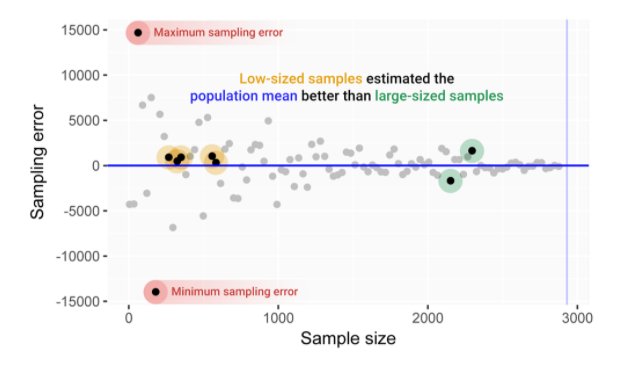

For any given sample size, we can have many combinations of values. For instance, for a sample size of 3, we can have many possible combinations of sale prices: [220,000, 143,000, 281,000], [123,600, 209,500, 202,665], [287,000, 142,500, 440,000], etc. Most of the samples of size 3 will give a good estimate of the population mean *μ*. To prove this point, in the code below we will:

* Measure the mean for 10,000 samples of size 3.
* Use a histogram to visualize the distribution of the sample means.
* Draw a vertical line corresponding to the population mean *μ*.

`library(tibble)
library(ggplot2)
library(scales)`

`set.seed(1)`

`mean_points <- replicate(n = 10000, expr = mean(sample(houses$SalePrice, size = 3)))`

`ggplot(data = tibble(mean_points), aes(x = mean_points)) +
    geom_histogram(bins = 10, position = "identity", alpha = 0.5) +
    geom_vline(aes(xintercept = mean(houses$SalePrice))) +
    scale_x_continuous(labels = comma, lim = c(0,500000)) +
    scale_y_continuous(labels = comma, lim = c(0,5500)) +
    xlab("Mean") + 
    ylab("")`

In the code above, notice the use of the [functions `scale_x_continuous` and `scale_y_continuous`](https://ggplot2.tidyverse.org/reference/scale_continuous.html), and the package `scales` (probably new for us!). These scale functions allow displaying the axes labels in decimal notation (versus scientific notation). These functions have the `lim` parameter to modify the axis boundaries instead of using `xlim()` or `ylim()` functions. If we try to use them while we also use the scale functions we will get this kind of warning:

`Scale for 'y' is already present. Adding another scale for 'y', which will replace the existing scale.`

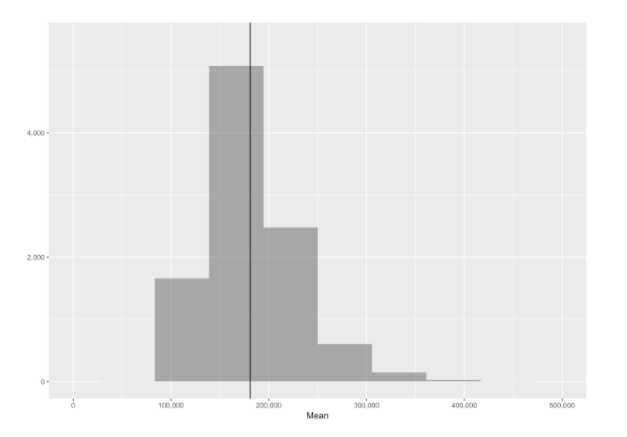

We can see that most sample means cluster around the population mean. This means that when we take a sample of size 3 and compute **¯x**, we have fairly good chances to get a good estimate for the population mean **μ**. This explains what we've seen in the scatter plot above, where we got good estimates from low-sized samples.

It's also worth noting that the mean of the 10,000 sample means is very close to the population mean **μ**

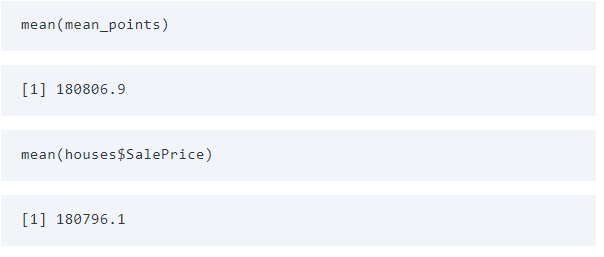

**Task**

* Take 10,000 samples of sample size 100 from the population of sale prices and measure the mean of each sample. 
* Use `geom_histogram()` to generate a histogram to visualize the distribution of sample means.

**Answer**

`library(tibble)
library(ggplot2)`

`set.seed(1)`

`mean_points <- replicate(n = 10000, 
                         expr = mean(sample(houses$SalePrice, 
                                            size = 100)))`

`ggplot(data = tibble(mean_points), aes(x = mean_points)) +
    geom_histogram(bins = 100,
                   position = "identity", 
                   alpha = 0.5) +
    geom_vline(aes(xintercept = mean(houses$SalePrice))) +
    xlab("Sample mean") + 
    ylab("Frequency") +
    xlim(0, 500000)`

We observed that the sample means vary less around the population mean when the sample size is 100 — compared to the cases where the sample size is 3.

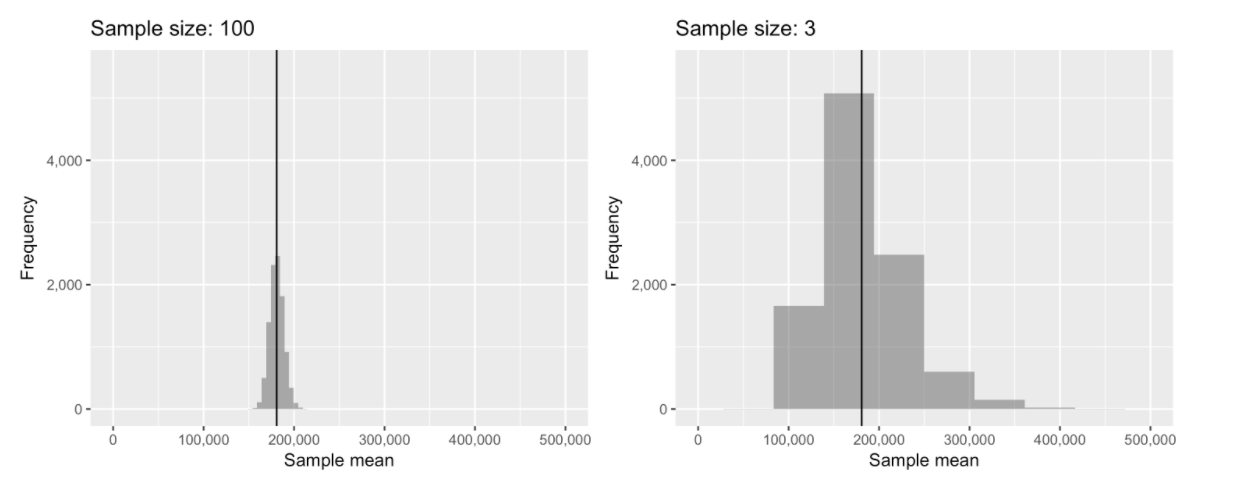

Generally, as we increase the sample size, there will be less and less variability around the population mean. If there's less variability, there are less chances to get a poor estimate for the population mean 

If we took all the possible samples for a given sample size, we'd observe that the mean of the sample means will be equal to the population mean. 

**Task**

* Proof above theory

**Answer**

`population  <-  c(3, 7, 2)`

`library(purrr)`

`samples  <-  list(c(3, 7), 
                  c(3, 2),
                  c(7, 2), 
                  c(7, 3),
                  c(2, 3),
                  c(2, 7))`

`sample_means <- map_dbl(samples, function(x) mean(x))`

`population_mean  <-  mean(population)`

`mean_of_sample_means  <-  mean(sample_means)`

`unbiased  <-  (population_mean == mean_of_sample_means)`

The value we got is the same as the population mean μ. So on average the sample mean is equal to the population mean.

When a statistic is on average equal to the parameter it estimates, we call that statistic an **unbiased estimator**. In our case, the sample mean ¯x is an unbiased estimator for the population mean μ.

This also holds true if we sample with replacement. When we do sampling with replacement